In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
df_dollars = pd.read_csv('Restaurant data.csv')

In [3]:
df_percent = pd.read_csv('Percent Change.csv')
df_percent.head()

,DATE,MRTSSM7225USN_PCH
0,2/1/1992,1.11820
1,3/1/1992,6.47172
2,4/1/1992,-1.95873
3,5/1/1992,7.19517
4,6/1/1992,-4.59641


In [4]:
df_dollars.rename(columns={'MRTSSM7225USN': 'Millions_Dollars', 'DATE': 'Date'}, inplace = True)
df_percent.rename(columns = {'MRTSSM7225USN_PCH':'Percent_Change', 'DATE':'Date'}, inplace = True)

Text(0.5, 1.0, ' Restaurant Sales (1992-2020)')

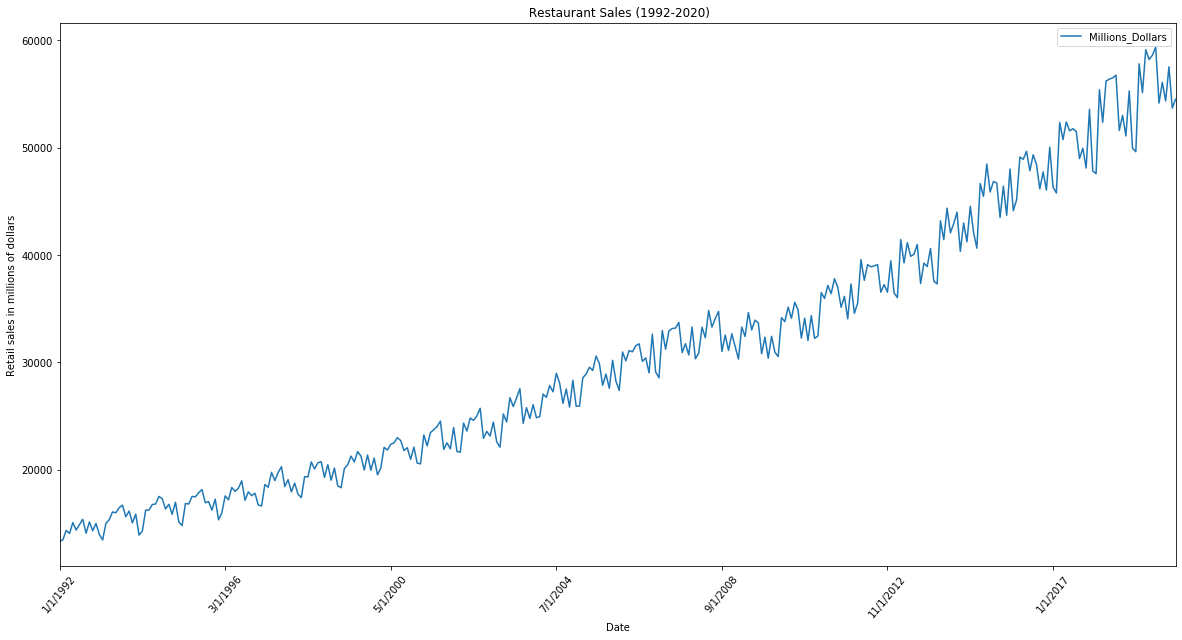

In [5]:
fig =df_dollars.plot.line(x='Date',rot=50,figsize=(20,10))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title(' Restaurant Sales (1992-2020)')

In [6]:
inflation = pd.read_csv('inflation_values.csv')


In [7]:
inflation.head()
inflation.shape

(339, 3)

In [8]:
inflation.rename(columns={'Unnamed: 0':'year'}, inplace=True)
inflation = inflation.fillna(0)
inflation = inflation.astype({'year':int})
inflation.set_index('year')

,inflation rate in %,adjusted inflation
year,,
0,0.15%,0.998500
1,0.36%,0.994905
2,0.51%,0.989831
3,0.14%,0.988446
4,0.14%,0.987062
...,...,...
334,-0.05%,0.533561
335,-0.09%,0.534041
336,0.39%,0.531958


In [9]:
restaurant_sales = df_dollars.assign(inflation = inflation['inflation rate in %']) 
restaurant_sales = df_dollars.assign(inflation_adjusted = inflation['adjusted inflation']) 
restaurant_sales.head()

,Date,Millions_Dollars,inflation_adjusted
0,1/1/1992,13325,0.998500
1,2/1/1992,13474,0.994905
2,3/1/1992,14346,0.989831
3,4/1/1992,14065,0.988446
4,5/1/1992,15077,0.987062


In [10]:
restaurant_inflated = []
for ind, row in restaurant_sales.iterrows():
    if (ind == 0):
        sales = restaurant_sales.loc[ind, 'Millions_Dollars'] 
        restaurant_inflated.append(sales)
    elif (ind == 339): 
        continue
    else:
        sales = restaurant_sales.loc[ind, 'Millions_Dollars']
        percent_inflation = (restaurant_sales.loc[ind-1, 'inflation_adjusted']) 
        adjusted = sales * percent_inflation
        restaurant_inflated.append(adjusted)

In [21]:
restaurant_sales = restaurant_sales.assign(restaurant_adjusted = restaurant_inflated)
restaurant_sales.shape

(338, 5)

Text(0.5, 1.0, 'Restaurant Sales (1992-2020)')

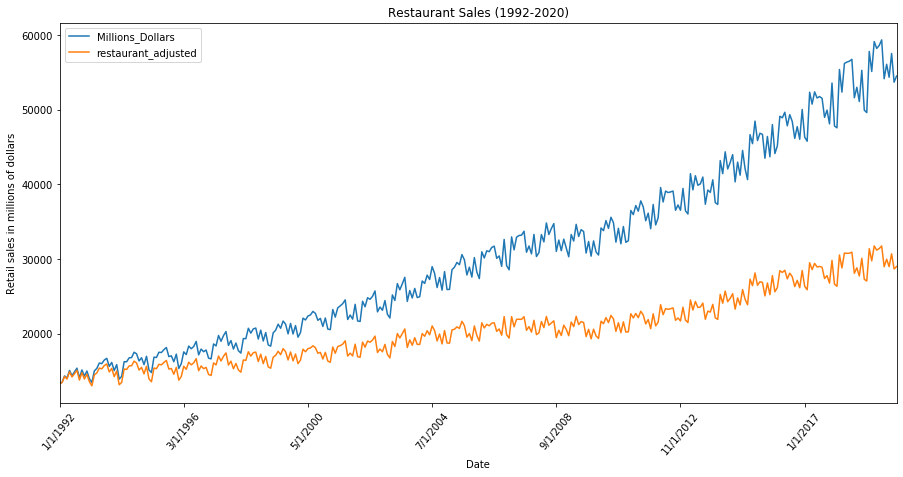

In [12]:
fig = restaurant_sales.plot.line(x='Date',y=['Millions_Dollars','restaurant_adjusted'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('Restaurant Sales (1992-2020)')

Text(0.5, 1.0, 'Restaurant Sales (1992-2020)')

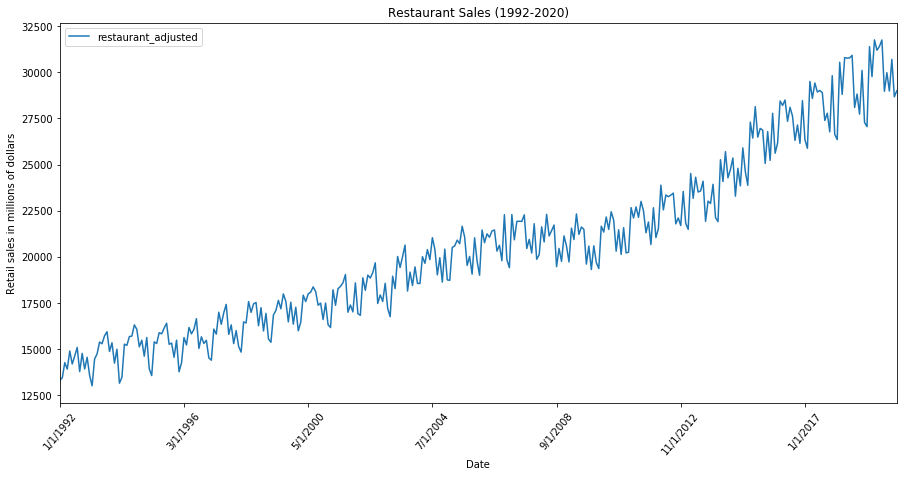

In [13]:
fig = restaurant_sales.plot.line(x='Date',y=['restaurant_adjusted'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('Restaurant Sales (1992-2020)')

In [14]:
url = 'https://raw.githubusercontent.com/agoebel8990/Group-54/master/ApprovalDataTo1989.csv'
approval_datadf = pd.read_csv(url, error_bad_lines = False)

In [15]:
approval_datadf.head()

,End Date,Approving,Disapproving,Unsure/NoData,President
0,2020-04-30,46.0,50.5,5.5,Trump
1,2020-03-31,46.5,48.5,5.0,Trump
2,2020-02-29,48.0,49.5,2.5,Trump
3,2020-01-31,46.5,51.5,2.0,Trump
4,2019-12-31,45.0,51.0,4.0,Trump


In [16]:
approval_datadf['date_month'] = approval_datadf['End Date'].str[:7]
approval_datadf

,End Date,Approving,Disapproving,Unsure/NoData,President,date_month
0,2020-04-30,46.0,50.500000,5.500000,Trump,2020-04
1,2020-03-31,46.5,48.500000,5.000000,Trump,2020-03
2,2020-02-29,48.0,49.500000,2.500000,Trump,2020-02
3,2020-01-31,46.5,51.500000,2.000000,Trump,2020-01
4,2019-12-31,45.0,51.000000,4.000000,Trump,2019-12
...,...,...,...,...,...,...
374,1989-05-31,58.4,20.400000,20.000000,Bush,1989-05
375,1989-04-30,55.5,16.500000,26.500000,Bush,1989-04
376,1989-03-31,60.0,14.666667,24.333333,Bush,1989-03
377,1989-02-28,60.0,11.000000,27.000000,Bush,1989-02


In [17]:
restaurant_sales['date_month'] = restaurant_sales['Date'].str[:7]

In [18]:
df = pd.merge(restaurant_sales, approval_datadf, how = 'outer')
df

,Date,Millions_Dollars,inflation_adjusted,restaurant_adjusted,date_month,End Date,Approving,Disapproving,Unsure/NoData,President
0,1/1/1992,13325.0,0.998500,13325.000000,1/1/199,NaN,NaN,NaN,NaN,NaN
1,1/1/1993,13975.0,0.967095,13581.702231,1/1/199,NaN,NaN,NaN,NaN,NaN
2,1/1/1994,13914.0,0.943183,13158.973881,1/1/199,NaN,NaN,NaN,NaN,NaN
3,1/1/1995,15133.0,0.917376,13938.398871,1/1/199,NaN,NaN,NaN,NaN,NaN
4,1/1/1996,15338.0,0.892892,13776.453439,1/1/199,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
712,NaN,NaN,NaN,NaN,1989-05,1989-05-31,58.4,20.400000,20.000000,Bush
713,NaN,NaN,NaN,NaN,1989-04,1989-04-30,55.5,16.500000,26.500000,Bush
714,NaN,NaN,NaN,NaN,1989-03,1989-03-31,60.0,14.666667,24.333333,Bush
715,NaN,NaN,NaN,NaN,1989-02,1989-02-28,60.0,11.000000,27.000000,Bush


Text(0.5, 1.0, 'The relationship between approval of the president and restaurant spending(1992-2020)')

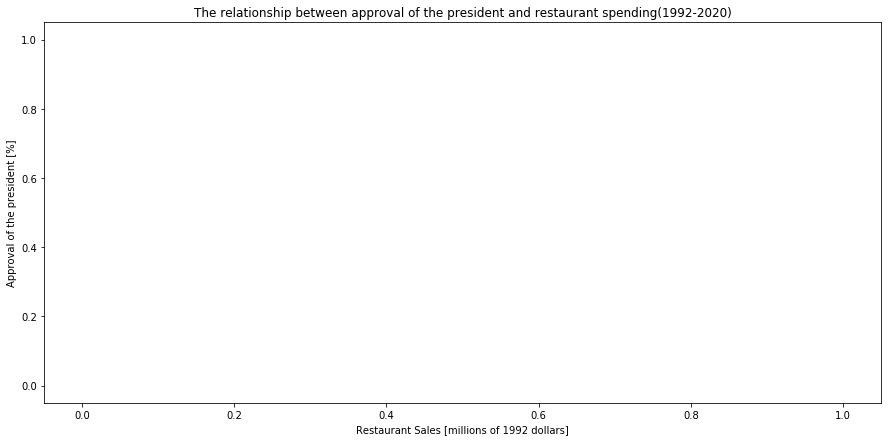

In [19]:
fig = df.plot.scatter(x='restaurant_adjusted', y='Approving', figsize=(15,7))
fig.set_xlabel('Restaurant Sales [millions of 1992 dollars]')
fig.set_ylabel('Approval of the president [%]')
fig.set_title('The relationship between approval of the president and restaurant spending(1992-2020)')